In [8]:
import pandas as pd
df = pd.read_csv('/content/twitter_training.csv')
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    Cleaned_Text  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  
Sentiment
Positive    13
Neutral      6
Name: count, dtype: int64


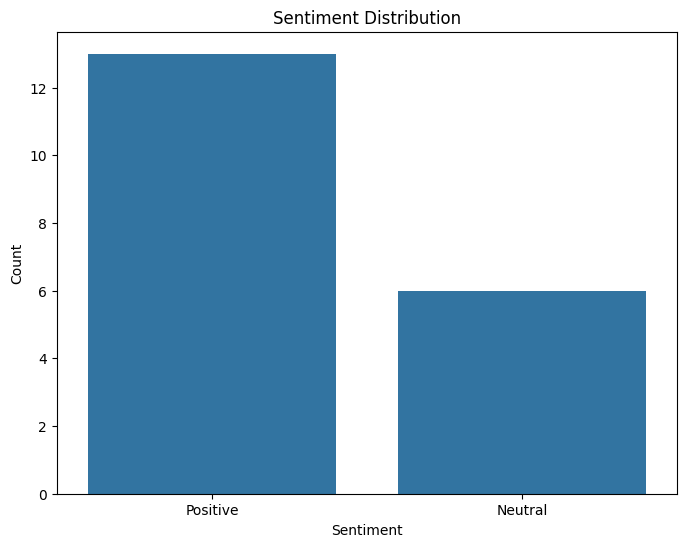

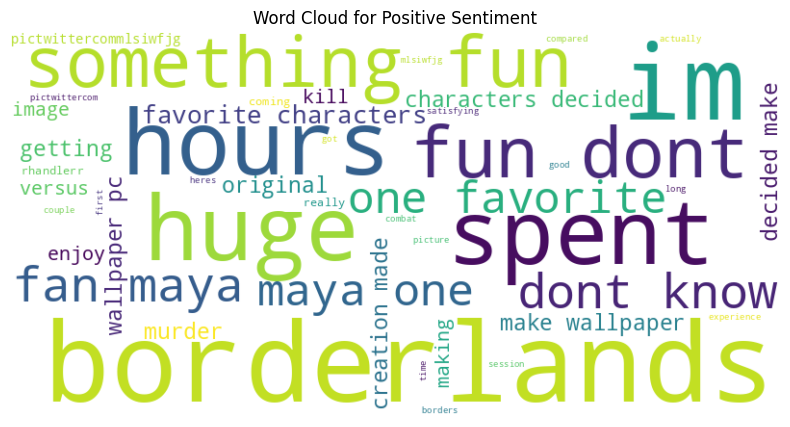

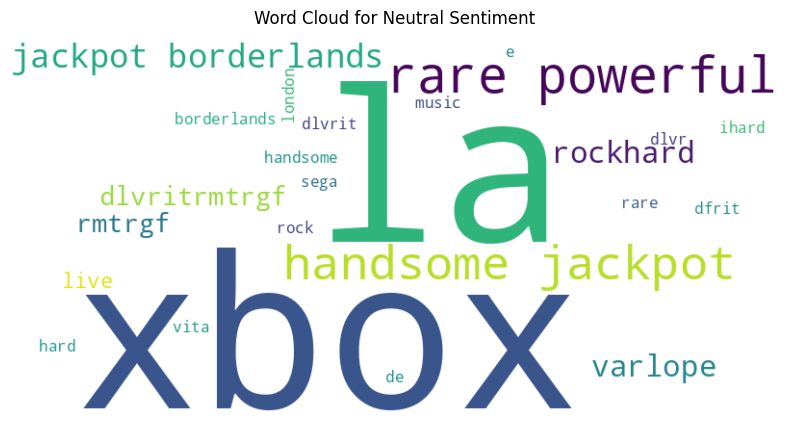

In [12]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')



# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text_tokens = word_tokenize(text)  # Tokenize text
    filtered_text = [word for word in text_tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(filtered_text)

# Apply preprocessing to the text column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
print(df.head())

# Analyze sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate word cloud for positive sentiment
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

# Generate word cloud for neutral sentiment
neutral_text = " ".join(df[df['Sentiment'] == 'Neutral']['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()
